In [5]:
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
  
dataset = gdal.Open('data/data/train_features/akny/B02.tif')

In [6]:
print(dataset.RasterCount)

1


In [7]:
band1 = dataset.GetRasterBand(1) # Red channel

In [8]:
b1 = band1.ReadAsArray()

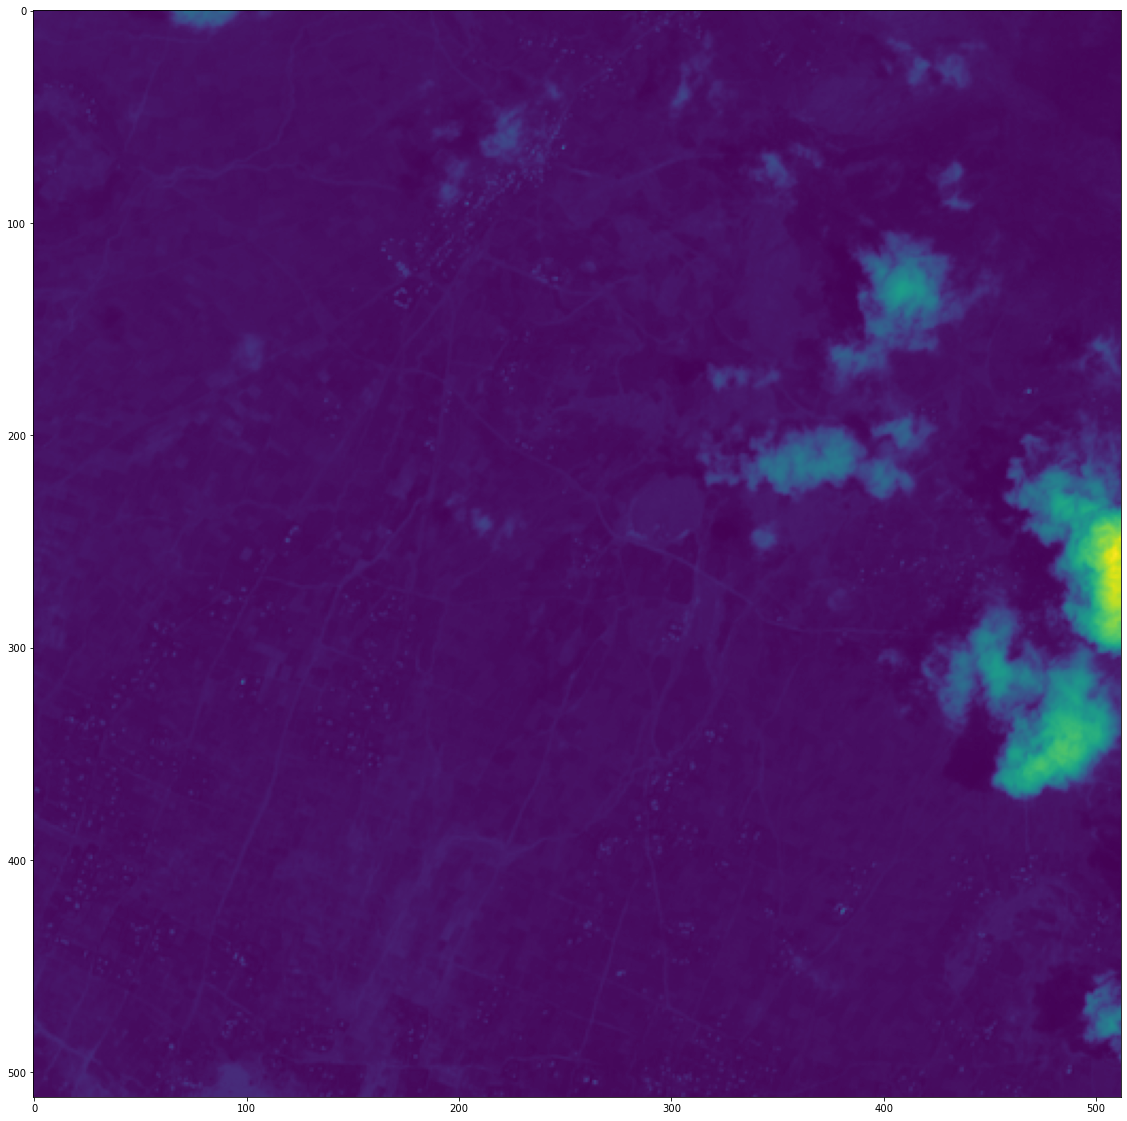

In [9]:
f = plt.figure()
f.set_size_inches(25,20)
plt.imshow(b1)
plt.savefig('Tiff.png')
plt.show()

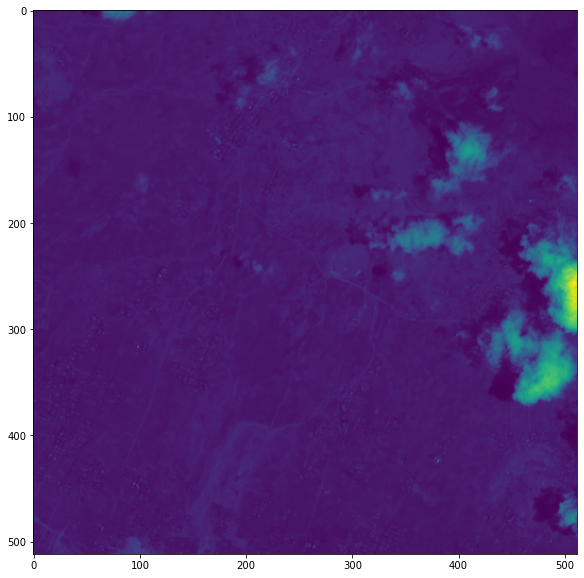

In [10]:
dataset2 = gdal.Open('data/data/train_features/akny/B03.tif')
plt.gcf().set_size_inches(15,10)
plt.imshow(dataset2.GetRasterBand(1).ReadAsArray())
plt.show()

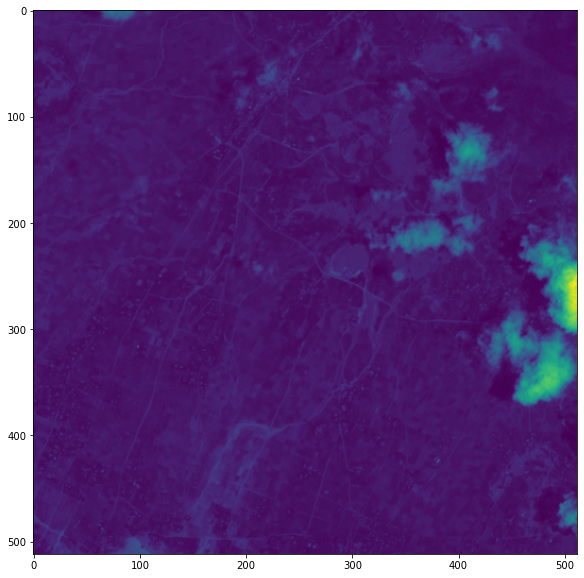

In [11]:
dataset2 = gdal.Open('data/data/train_features/akny/B04.tif')
plt.gcf().set_size_inches(15,10)
plt.imshow(dataset2.GetRasterBand(1).ReadAsArray())
plt.show()

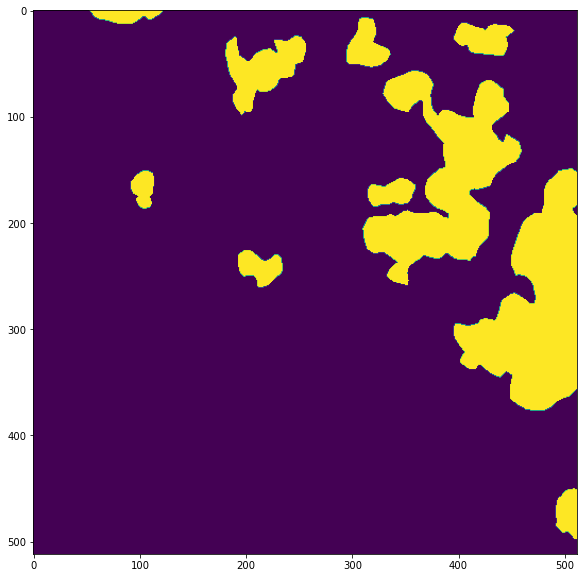

In [12]:
dataset3 = gdal.Open('data/data/train_labels/akny.tif')
plt.gcf().set_size_inches(15,10)
plt.imshow(dataset3.GetRasterBand(1).ReadAsArray())
plt.show()

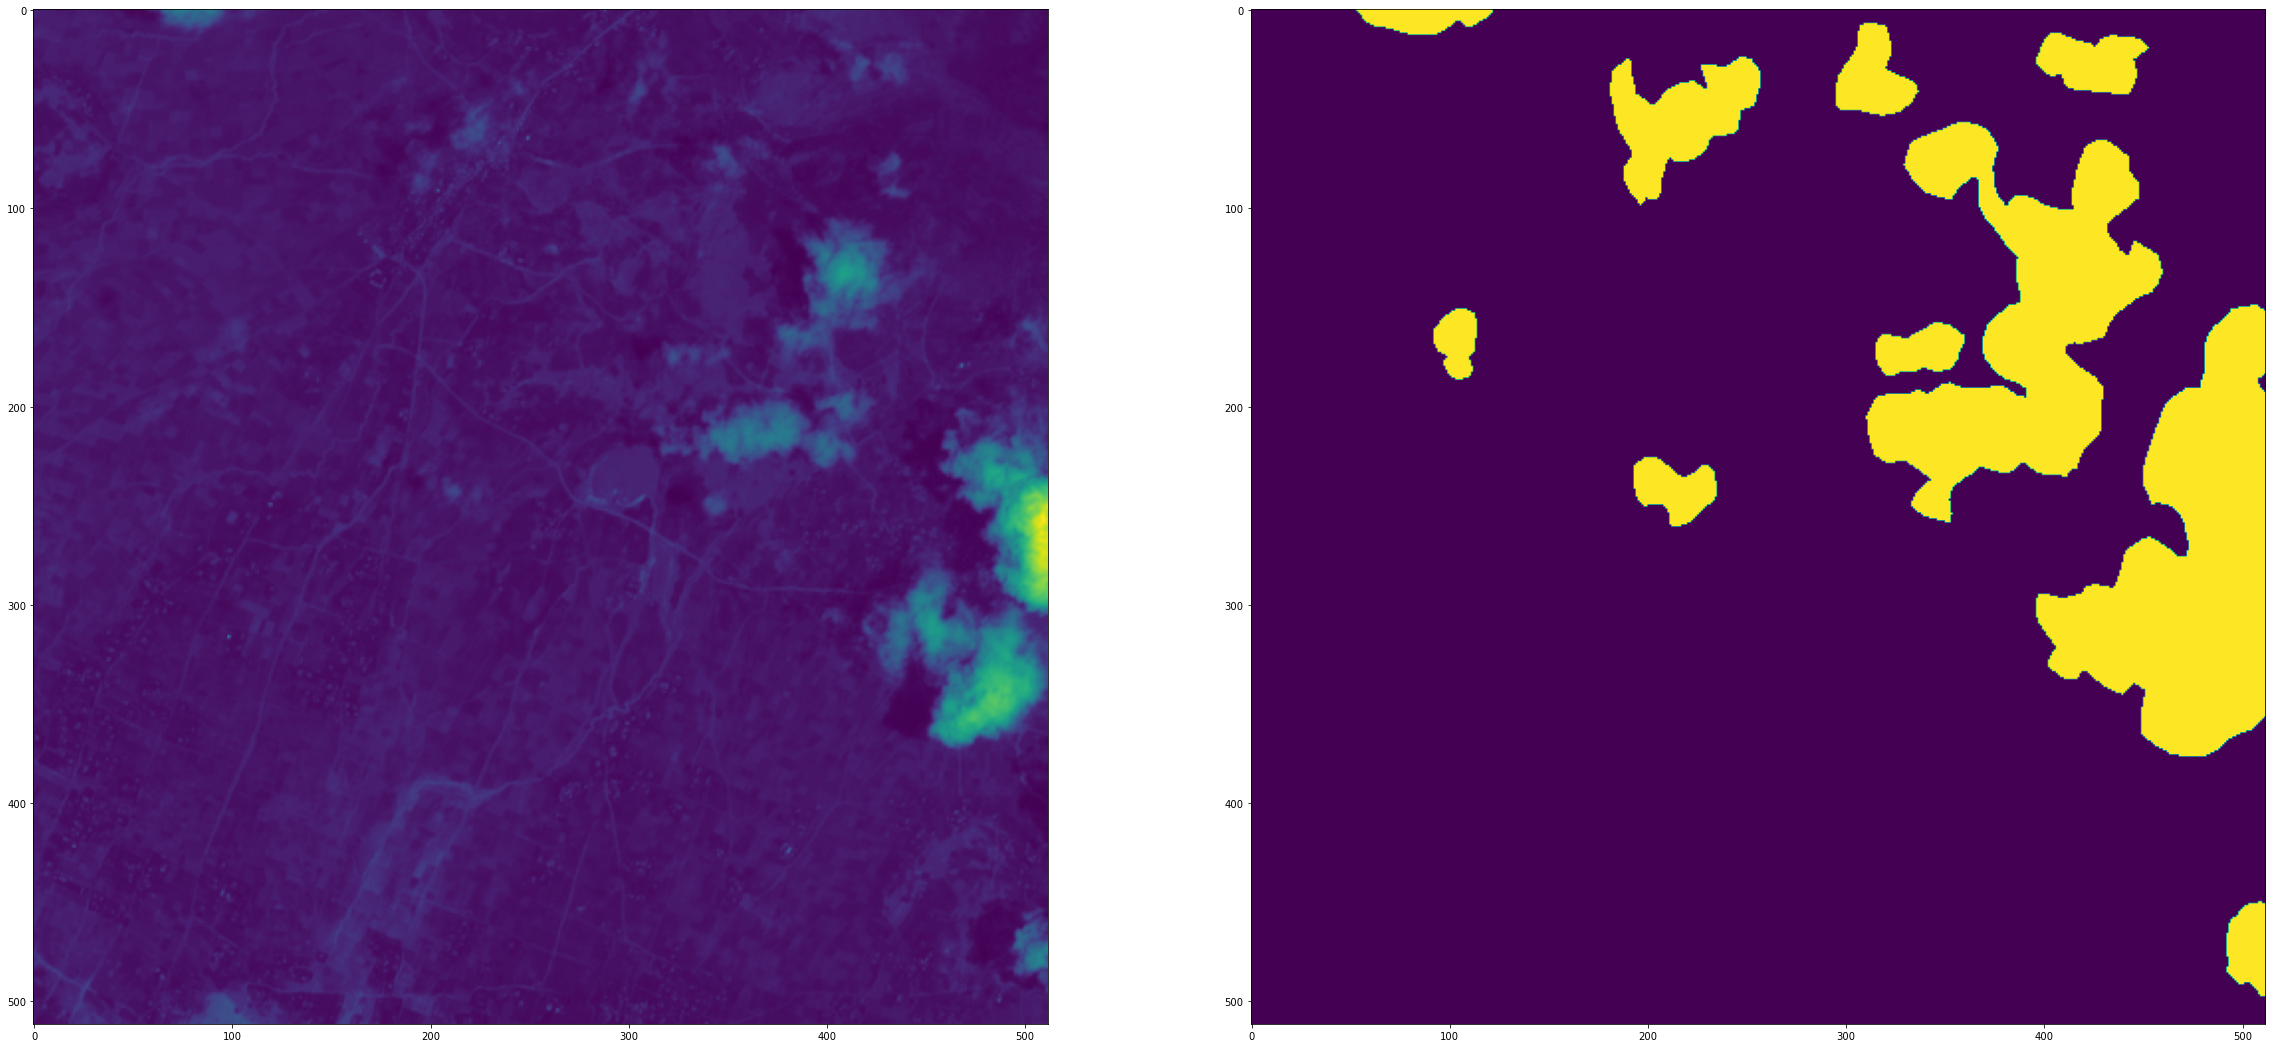

In [13]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(40,25)
ax[0].imshow(dataset2.GetRasterBand(1).ReadAsArray())
ax[1].imshow(dataset3.GetRasterBand(1).ReadAsArray())

In [14]:
from cloud_model import CloudModel

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Set up pytorch_lightning.Trainer object
cloud_model = CloudModel(
    bands=BANDS,
    x_train=train_x,
    y_train=train_y,
    x_val=val_x,
    y_val=val_y,
)
checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor="iou_epoch", mode="max", verbose=True
)
early_stopping_callback = pl.callbacks.early_stopping.EarlyStopping(
    monitor="iou_epoch",
    patience=(cloud_model.patience * 3),
    mode="max",
    verbose=True,
)

trainer = pl.Trainer(
    gpus=None,
    fast_dev_run=False,
    callbacks=[checkpoint_callback, early_stopping_callback],
)

NameError: name 'BANDS' is not defined